In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('/content/claims_dummy_data.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Claim ID                 382154 non-null  int64 
 1   Gender                   382154 non-null  object
 2   Age                      382154 non-null  int64 
 3   Driving_License          382154 non-null  int64 
 4   Region_Code              382154 non-null  int64 
 5   Previously_Insured       382154 non-null  int64 
 6   Vehicle_Age              382154 non-null  object
 7   Previous_Vehicle_Damage  382154 non-null  object
 8   Annual_Premium           382154 non-null  int64 
 9   Policy_Sales_Channel     382154 non-null  int64 
 10  Response                 382154 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 32.1+ MB


**Data Overview and Insights**



In [5]:
df.isnull().sum()

Missing values in each column:
 Claim ID                   0
Gender                     0
Age                        0
Driving_License            0
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Previous_Vehicle_Damage    0
Annual_Premium             0
Policy_Sales_Channel       0
Response                   0
dtype: int64


No Missing Values: All columns have a full count of non-null values.

In [6]:
df.describe(include='all')

,Claim ID,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Previous_Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
count,382154.000000,382154,382154.000000,382154.000000,382154.000000,382154.000000,382154,382154,382154.000000,382154.000000,382154.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,No,NaN,NaN,NaN
freq,NaN,205603,NaN,NaN,NaN,NaN,200176,198501,NaN,NaN,NaN
mean,234392.953477,NaN,38.545691,0.998108,26.406867,0.489182,NaN,NaN,30711.271362,111.939812,0.163811
std,139527.487326,NaN,15.226897,0.043455,13.181241,0.499884,NaN,NaN,17061.595532,54.286511,0.370104
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,0.000000
25%,115006.250000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24546.000000,26.000000,0.000000
50%,230461.500000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31692.000000,145.000000,0.000000
75%,345434.750000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39447.750000,152.000000,0.000000


## **Dealing with Misising Values in Categorical**

For dealing with missing values in features which are categorical, Instead of dropping the missing values, I would have created a new category called "UNKNOWN" and then placed the NaN data rows in that category, thereby preserving the data.

But since it is not the case here, I have just added the code and commented it

In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Replace missing values in categorical columns with 'UNKNOWN'
for column in categorical_columns:
    if df[column].isna().sum() > 0:  # Check if there are any missing values
        df[column] = df[column].fillna('UNKNOWN')

# Display a summary of the dataset after handling missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Claim ID                 382154 non-null  int64 
 1   Gender                   382154 non-null  object
 2   Age                      382154 non-null  int64 
 3   Driving_License          382154 non-null  int64 
 4   Region_Code              382154 non-null  int64 
 5   Previously_Insured       382154 non-null  int64 
 6   Vehicle_Age              382154 non-null  object
 7   Previous_Vehicle_Damage  382154 non-null  object
 8   Annual_Premium           382154 non-null  int64 
 9   Policy_Sales_Channel     382154 non-null  int64 
 10  Response                 382154 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 32.1+ MB


In [8]:
# Data Types of Each Column
df.dtypes

Data Types of Each Column:
 Claim ID                    int64
Gender                     object
Age                         int64
Driving_License             int64
Region_Code                 int64
Previously_Insured          int64
Vehicle_Age                object
Previous_Vehicle_Damage    object
Annual_Premium              int64
Policy_Sales_Channel        int64
Response                    int64
dtype: object


Data Types:

- Numerical: Age, Driving_License, Region_Code, Previously_Insured, Annual_Premium, Policy_Sales_Channel, Response

- Categorical: Gender, Vehicle_Age, Previous_Vehicle_Damage

In [9]:
# Unique Values for Each Feature
print("\nUnique Values in Each Column:")
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")


Unique Values in Each Column:
Claim ID: [167647  17163  32023 ... 165293 383241 401019]
Gender: ['Male' 'Female']
Age: [22 42 66 28 25 51 38 45 26 33 76 23 49 52 24 21 48 35 36 44 60 57 56 73
 54 50 72 58 41 27 61 59 29 64 37 46 31 68 39 63 40 30 62 69 65 78 79 55
 74 47 34 67 53 70 32 43 71 20 77 75 80 81 85 83 82 84]
Driving_License: [1 0]
Region_Code: [ 7 28 33 46 25  8 41 39 13 14 36  3 43 45 48 11 30 15  6 50 38 19 34 22
 29 35 12 37  4 10 40 24 31 21  2 52  9 49  5 47  1 20 42 27 26 32 18 16
 17 51  0 23 44]
Previously_Insured: [1 0]
Vehicle_Age: ['< 1 Year' '1-2 Year' '> 2 Years']
Previous_Vehicle_Damage: ['No' 'Yes']
Annual_Premium: [ 2630 43327 35841 ... 68063 67176 49322]
Policy_Sales_Channel: [152  26 124 122 158 157 156 160  24 153  55   1   8  88  13  11 163 151
   7   9  15  31 120  30 150  25  61 154  64 155 113 108 125  52 121  16
  44  14  29   4  54   3 111  60  12  46 103  42  65 136 109  91  34 106
  22  53 139 127 105  21 131  37  23  45 159  98  18  19 137 145 12

Unique Values:

- Gender: Binary categorical (Male, Female)
- Vehicle_Age: Three categories (< 1 Year, 1-2 Year, > 2 Years)
- Previous_Vehicle_Damage: Binary categorical (Yes, No)

#**EDA**

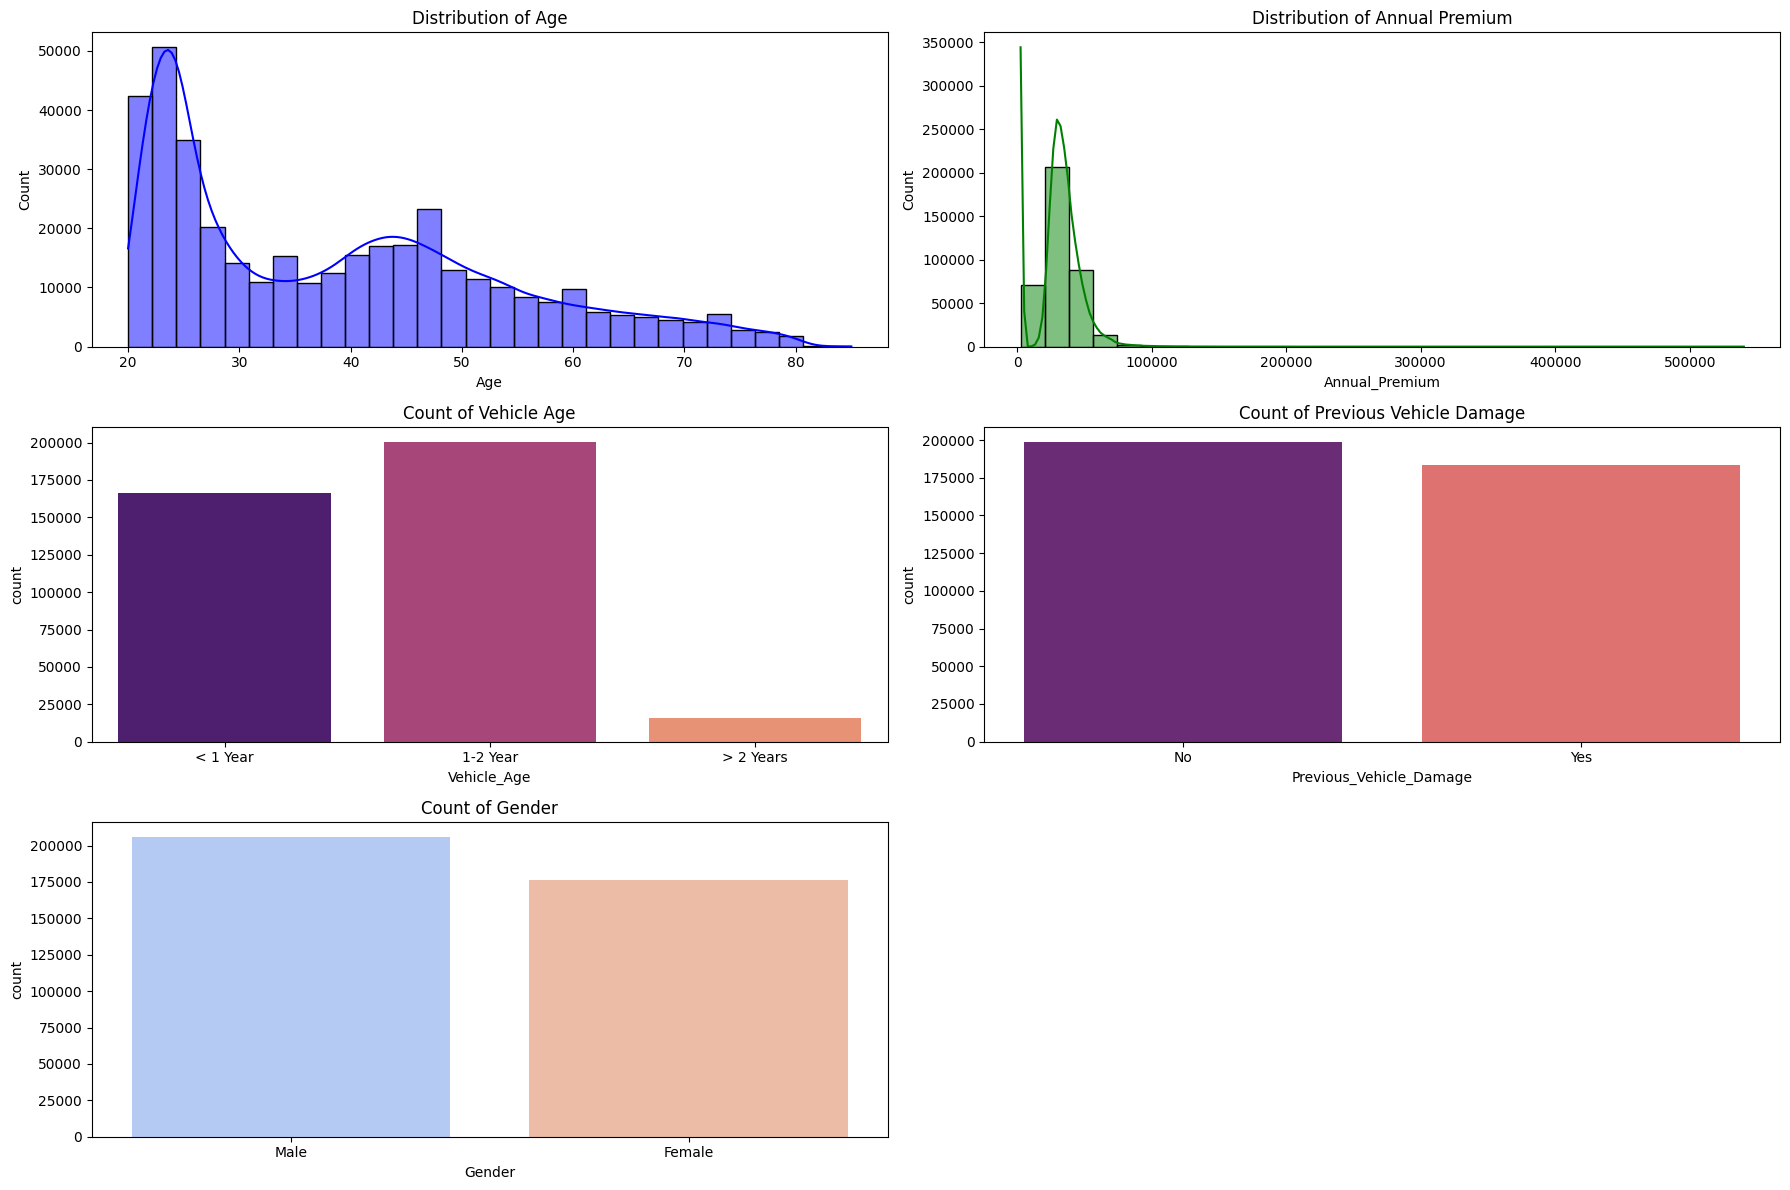

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))

# Univariate Analysis: Distribution of Age
plt.subplot(3, 2, 1)
sns.histplot(data=df, x='Age', bins=30, kde=True, color='blue')
plt.title('Distribution of Age')

# Univariate Analysis: Distribution of Annual Premium
plt.subplot(3, 2, 2)
sns.histplot(data=df, x='Annual_Premium', bins=30, kde=True, color='green')
plt.title('Distribution of Annual Premium')

# Univariate Analysis: Count of Vehicle Age
plt.subplot(3, 2, 3)
sns.countplot(data=df, x='Vehicle_Age', palette='magma')
plt.title('Count of Vehicle Age')

# Univariate Analysis: Count of Previous Vehicle Damage
plt.subplot(3, 2, 4)
sns.countplot(data=df, x='Previous_Vehicle_Damage', palette='magma')
plt.title('Count of Previous Vehicle Damage')

# Univariate Analysis: Count of Gender
plt.subplot(3, 2, 5)
sns.countplot(data=df, x='Gender', palette='coolwarm')
plt.title('Count of Gender')

plt.tight_layout()
plt.show()

### Univariate Analysis Observations

**Age Distribution:** The age distribution is skewed towards younger customers, with a peak around 25-30 years. There is a gradual decline in the number of customers as age increases.

**Annual Premium Distribution:**The distribution of annual premiums is right-skewed, with most premiums clustered around lower values. There are some customers with significantly higher premiums, suggesting outliers or high-value policies.

**Vehicle Age**: Most vehicles in the dataset are either < 1 Year or 1-2 Year old, with fewer vehicles older than 2 Years.

**Previous Vehicle Damage:** There is a noticeable split between customers with and without previous vehicle damage, with more customers having no previous damage (0).

**Gender:** The dataset contains more male (1) customers than female (0) customers.

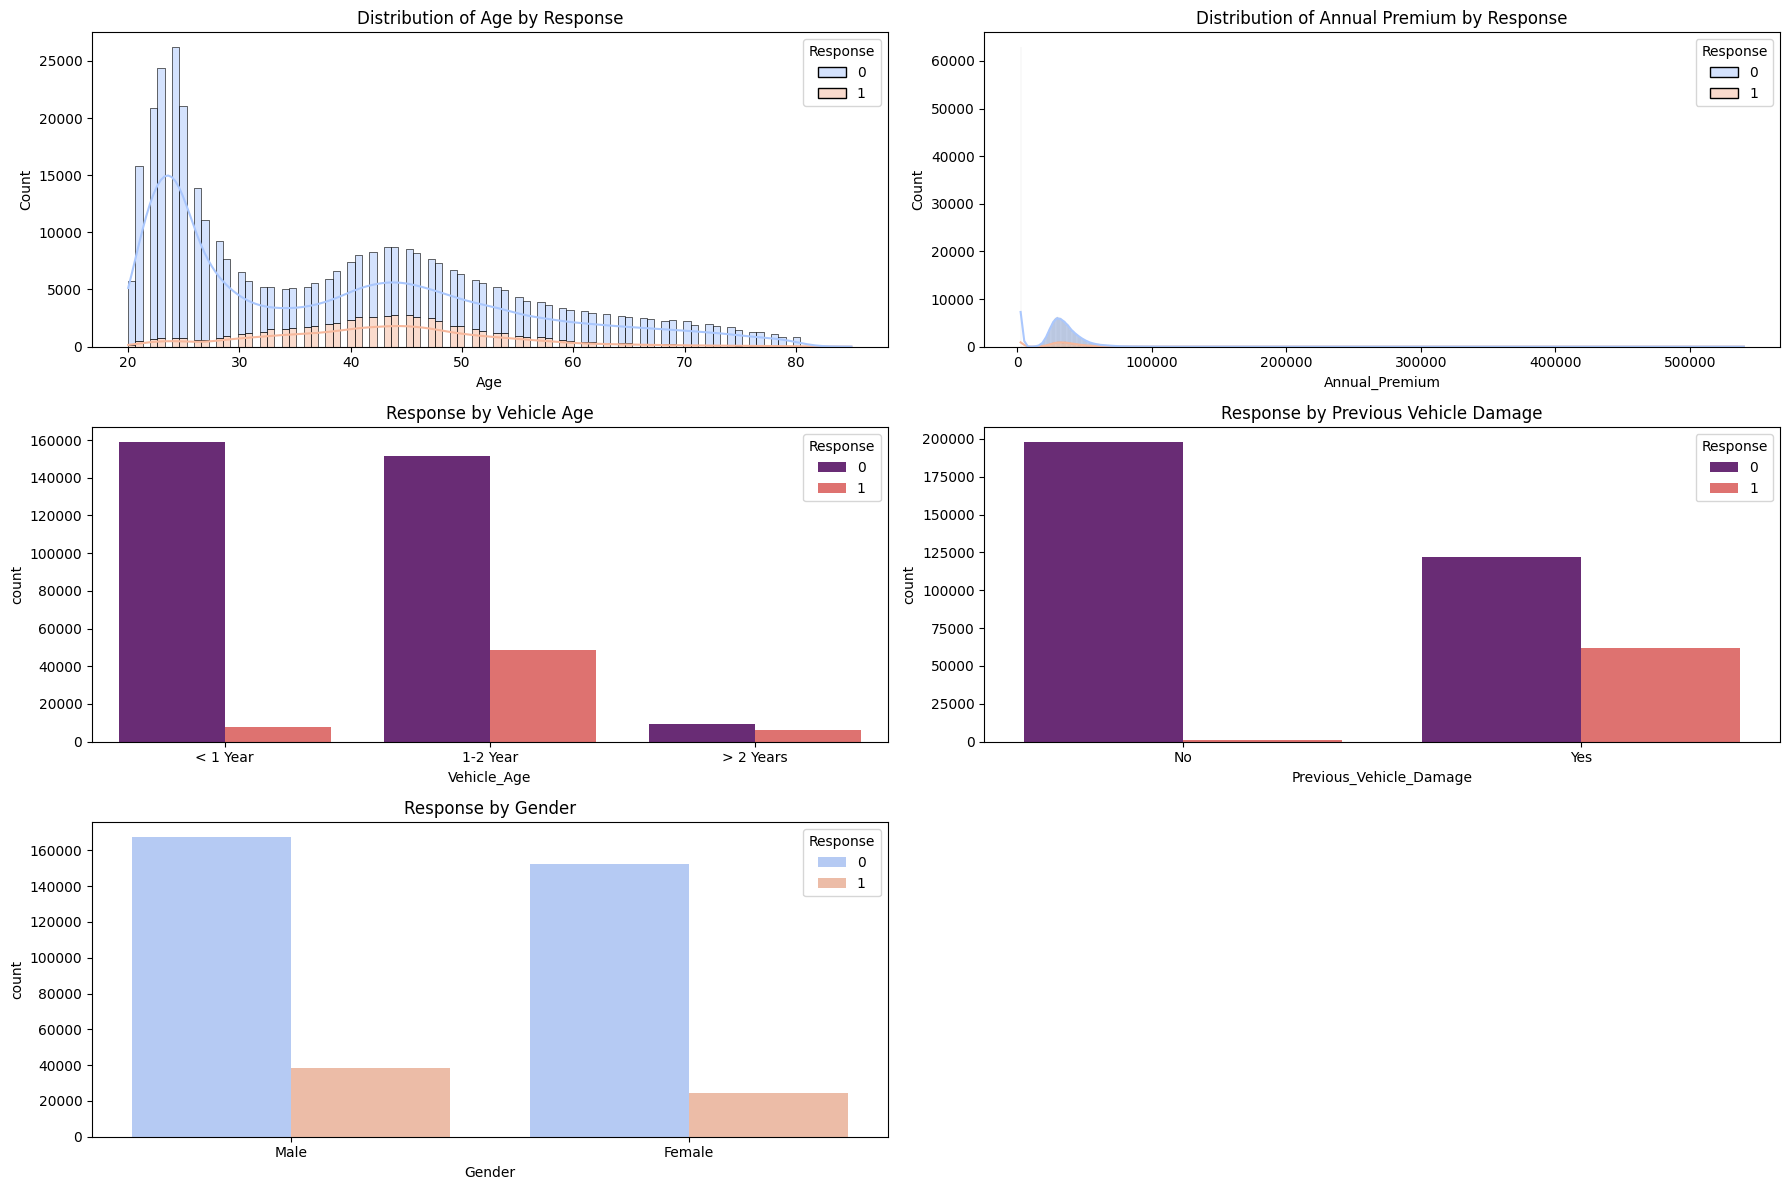

In [11]:
plt.figure(figsize=(18, 12))

# Bivariate Analysis: Distribution of Age by Response
plt.subplot(3, 2, 1)
sns.histplot(data=df, x='Age', hue='Response', multiple='stack', kde=True, palette='coolwarm')
plt.title('Distribution of Age by Response')

# Bivariate Analysis: Distribution of Annual Premium by Response
plt.subplot(3, 2, 2)
sns.histplot(data=df, x='Annual_Premium', hue='Response', multiple='stack', kde=True, palette='coolwarm')
plt.title('Distribution of Annual Premium by Response')

# Bivariate Analysis: Response by Vehicle Age
plt.subplot(3, 2, 3)
sns.countplot(data=df, x='Vehicle_Age', hue='Response', palette='magma')
plt.title('Response by Vehicle Age')

# Bivariate Analysis: Response by Previous Vehicle Damage
plt.subplot(3, 2, 4)
sns.countplot(data=df, x='Previous_Vehicle_Damage', hue='Response', palette='magma')
plt.title('Response by Previous Vehicle Damage')

# Bivariate Analysis: Response by Gender
plt.subplot(3, 2, 5)
sns.countplot(data=df, x='Gender', hue='Response', palette='coolwarm')
plt.title('Response by Gender')

plt.tight_layout()
plt.show()

## Bivariate Analysis Observations

**Age by Response:** Younger customers (in their 20s and 30s) appear more likely to submit a claim (Response = 1). The distribution for customers who did not submit a claim (Response = 0) spans a wider age range, suggesting that age could be an important predictor.

**Annual Premium by Response:** Higher annual premiums seem to be associated with a higher likelihood of submitting a claim (Response = 1). Lower premiums are more commonly associated with Response = 0, indicating a potential relationship between the premium amount and claim submission.

**Vehicle Age by Response:** Customers with older vehicles (Vehicle_Age = 2 for > 2 Years) are more likely to submit a claim, whereas customers with newer vehicles (Vehicle_Age = 0 for < 1 Year) have lower claim submission rates. Vehicle age seems to have a significant impact on the likelihood of a claim.

**Previous Vehicle Damage by Response:** Customers with previous vehicle damage (Previous_Vehicle_Damage = 1) have a higher probability of submitting a claim compared to those without previous damage (Previous_Vehicle_Damage = 0). This feature shows a strong association with the target variable.

**Gender by Response:** There is a slight difference in claim submission rates between male and female customers, with males (Gender = 1) slightly more likely to submit a claim. However, the difference is not as pronounced as with other features.

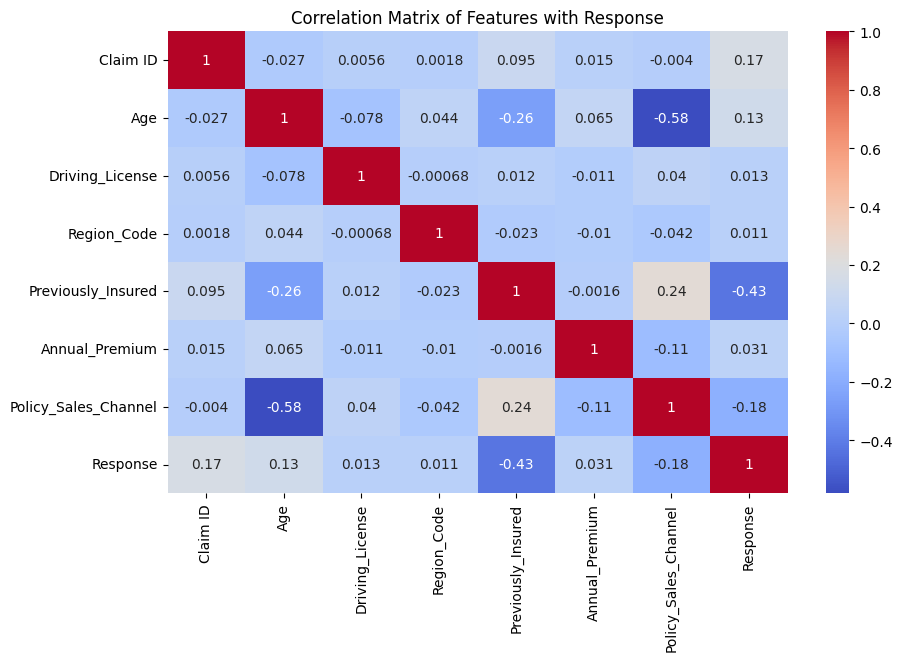

In [12]:
# Correlation matrix to check relationships between numerical features and the target variable
plt.figure(figsize=(10, 6))
# Select only numerical columns for correlation calculation
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features with Response')
plt.show()

## Correlation Analysis Observations

**Previously_Insured** has a strong negative correlation with Response. This suggests that customers who were previously insured are less likely to submit a claim.

**Previous_Vehicle_Damage** shows a moderate positive correlation with Response. This aligns with the earlier observation that customers with previous vehicle damage are more likely to submit a claim.

Other features, such as **Vehicle_Age** and **Annual_Premium**, show weaker correlations with Response, indicating they may still have predictive value but are less directly associated.

The correlation matrix shows low to moderate correlations between most features, suggesting that multicollinearity is not a significant concern.

**Encoding and Scaling the Dataset**

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming df is already loaded as the cleaned dataset
# Initialize DataFrame for final prepared data
prepared_data = pd.DataFrame()

# Encode 'Gender' remains the same as binary (1 for Male, 0 for Female)
prepared_data['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Scale 'Age' using MinMaxScaler
min_max_scaler = MinMaxScaler()
prepared_data['Age'] = min_max_scaler.fit_transform(df[['Age']])

# Include 'Driving_License' remains the same as binary (1 for Yes, 0 for No)
prepared_data['Driving_License'] = df['Driving_License']  # Already binary

# Scale 'Annual_Premium' using StandardScaler
standard_scaler = StandardScaler()
prepared_data['Annual_Premium'] = standard_scaler.fit_transform(df[['Annual_Premium']])

# Encode 'Vehicle_Age' categorically using get_dummies and drop_first=True
vehicle_age_dummies = pd.get_dummies(df['Vehicle_Age'], prefix='Vehicle_Age', drop_first=False)
vehicle_age_dummies = vehicle_age_dummies.astype(int)  # Convert any True/False to 1/0
prepared_data = pd.concat([prepared_data, vehicle_age_dummies], axis=1)

# Encode 'Region_Code' categorically using get_dummies and drop_first=True
region_code_dummies = pd.get_dummies(df['Region_Code'], prefix='Region_Code', drop_first=False)
region_code_dummies = region_code_dummies.astype(int)  # Convert any True/False to 1/0
prepared_data = pd.concat([prepared_data, region_code_dummies], axis=1)

# Encode 'Policy_Sales_Channel' categorically using get_dummies and drop_first=True
policy_sales_channel_dummies = pd.get_dummies(df['Policy_Sales_Channel'], prefix='Policy_Sales_Channel', drop_first=False)
policy_sales_channel_dummies = policy_sales_channel_dummies.astype(int)  # Convert any True/False to 1/0
prepared_data = pd.concat([prepared_data, policy_sales_channel_dummies], axis=1)

# Include 'Previously_Insured' remains the same as binary (1 for Yes, 0 for No)
prepared_data['Previously_Insured'] = df['Previously_Insured']  # Already binary

# Encode 'Previous_Vehicle_Damage' as binary (1 for Yes, 0 for No)
prepared_data['Previous_Vehicle_Damage'] = df['Previous_Vehicle_Damage'].map({'Yes': 1, 'No': 0})

# Include 'Response' remains the same as binary (1 for Yes, 0 for No)
prepared_data['Response'] = df['Response']  # Already binary

# Display the first few rows of the final prepared dataset
prepared_data.head()


,Gender,Age,Driving_License,Annual_Premium,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Region_Code_0,Region_Code_1,Region_Code_2,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Previously_Insured,Previous_Vehicle_Damage,Response
0,1,0.030769,1,-1.645878,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0.338462,1,0.739424,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0.707692,1,0.300660,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0.030769,1,-0.179718,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.123077,1,-0.098952,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Encoding

- Gender: Encoded as 1 for Male and 0 for Female.
- Driving_License: Encoded as 1 for Yes and 0 for No.
- Previously_Insured: Encoded as 1 for Yes and 0 for No.
- Previous_Vehicle_Damage: Encoded as 1 for Yes and 0 for No.
- Response: Encoded as 1 for Yes (submitted a claim) and 0 for No (did not submit a claim).
- Vehicle_Age: Encoded as:
0 for < 1 Year
1 for 1-2 Year
2 for > 2 Years

#### Scaling

- Annual_Premium
- Region_Code
- Policy_Sales_Channel

In [41]:
prepared_data.head()

,Gender,Age,Driving_License,Annual_Premium,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Region_Code_0,Region_Code_1,Region_Code_2,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Previously_Insured,Previous_Vehicle_Damage,Response
0,1,0.030769,1,-1.645878,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0.338462,1,0.739424,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0.707692,1,0.300660,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0.030769,1,-0.179718,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.123077,1,-0.098952,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
prepared_data.columns = [str(col) for col in prepared_data.columns]

In [43]:
prepared_data.describe(include='all')

,Gender,Age,Driving_License,Annual_Premium,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Region_Code_0,Region_Code_1,Region_Code_2,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Previously_Insured,Previous_Vehicle_Damage,Response
count,382154.000000,382154.000000,382154.000000,3.821540e+05,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,...,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,0.538011,0.285318,0.998108,5.397577e-17,0.523810,0.435304,0.040887,0.004812,0.002460,0.009742,...,0.003281,0.026445,0.017634,0.001287,0.000136,0.055069,0.007777,0.489182,0.480573,0.163811
std,0.498554,0.234260,0.043455,1.000001e+00,0.499433,0.495797,0.198028,0.069203,0.049535,0.098220,...,0.057190,0.160454,0.131618,0.035858,0.011664,0.228116,0.087844,0.499884,0.499623,0.370104
min,0.000000,0.000000,0.000000,-1.645878e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.076923,1.000000,-3.613542e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.246154,1.000000,5.748172e-02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.446154,1.000000,5.120559e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,2.985972e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
prepared_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Columns: 219 entries, Gender to Response
dtypes: float64(2), int64(217)
memory usage: 638.5 MB


In [45]:
prepared_data.to_csv('cleaned_claims_dataset.csv', index=False)